# Monte Carlo Methods

This exercise address the use of “random” numbers in Monte Carlo techniques. These are often the fastest or most straightforward way of tackling complicated problems in computational analysis.

You should use the random number routines included in numpy.random :
https://docs.scipy.org/doc/numpy-1.14.0/reference/routines.random.html

This library uses the "Mersenne Twister" algorithm internally, which is a modern, well behaved, pseudo-random number generator. Note that, by default, the generator will be initialised with a "seed" based on the time when the programme is started - giving a different sequence of numbers every time you run the programme. You may find it useful, while debuggging, to manually set a fixed "seed" at the start of the programme.  This will result in an identical sequence of random numbers, every time you run the programme.

## Q1 - Generating Distributions

In practise we usually want to generate floating point numbers with a particular distribution. Numpy.random includes several built-in distributions, however we often need to write our own. Two methods for achieving this were discussed in Lecture 3 :
1) an analytical function derived from the cumulative distribution function of the desired distribution.
2) the accept/reject method

### 1a)
Write code to generate random angles $\theta$, between 0 and $\pi$, with a probability distribution proportional to ${\rm sin}(\theta)$. You should write one routine based on the analytical method 1), and another using the accept/reject method. Both routines should use _numpy.random.random()_ to generate floating point numbers with a distribution between 0 and 1, and convert this to the desired ${\rm sin}(\theta)$ distribution.

In [85]:
import numpy as np
import matplotlib.pylab as plt
import time

""" Method 1: analytical with inverse funtion method. """

def arccos(x):
    return np.arccos(x)

def sindis_analytical(n,f):
    randdis = np.empty(n)
    for i in range(len(randdis)):
        randdis[i] = np.random.uniform(-1,1) 
    
    c = f(randdis)
    
    return randdis, c


""" Method 2: Accept/reject """  


def sin(x):
    return np.sin(x)
    
def sinddis_acc_rej(n,f,ymax):
    xn = []
    yn = []
    while len(xn) < n:
        x = np.random.uniform(0,1)  
        y = np.random.uniform(0,ymax)
        if x < f(y):
            xn.append(x)
            yn.append(y)
        
    return yn, x


""" Test of Random values """


def Rand_test(n):
    X = []
    for i in range(0,n):
        x = np.random.uniform(0,1)
        X.append(x)
    plt.hist(X, bins = 100)
    plt.title('The Distribution of random values from Numpy.random.uniform')
    plt.xlabel('Value of random value')
    plt.ylabel('Number of created values in bin')
    plt.show()


   

### 1b)
Now verify that the two routines produce the desired distribution, and evaluate their performance (in both cpu terms and accuracy).  Discuss your results in the text cell below.

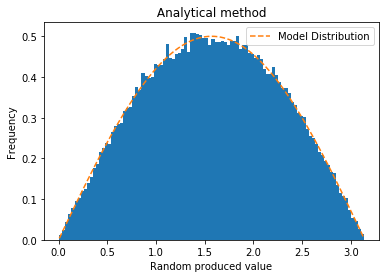

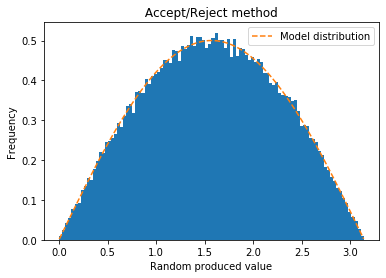

Analytical time:  0.2139407999929972
Accept/reject time:  0.9627218999958131


In [86]:

def Verify(n):    
    tic1 = time.perf_counter()
    vals = sindis_analytical(n,arccos)
    toc1 = time.perf_counter()
    t1 = toc1 - tic1

    fig, ax = plt.subplots()
    no, bins, patches = ax.hist(vals[1], 100, density=1)
    y = 0.5*np.sin(bins) # normalised
    ax.plot(bins,y,'--',label='Model Distribution')
    ax.set_xlabel('Random produced value')
    ax.set_ylabel('Frequency')
    ax.set_title(' Analytical method ')
    plt.legend()
    plt.show()
    
    tic2 = time.perf_counter()
    sdvals = sinddis_acc_rej(n,sin,np.pi)
    toc2 = time.perf_counter()
    t2 = toc2 - tic2

    fig, ax = plt.subplots()
    no, bins, patches = ax.hist(sdvals[0], 100, density=1)
    y = 0.5*np.sin(bins) # normalised
    ax.plot(bins,y,'--',label='Model distribution')
    ax.set_xlabel('Random produced value')
    ax.set_ylabel('Frequency')
    ax.set_title(' Accept/Reject method ')
    plt.legend()
    plt.show()
    print('Analytical time: ',t1)
    print('Accept/reject time: ',t2)

    
def Time_distribution(N):
    ta = []
    tar = []
    for n in range(1,N):
        tic1 = time.perf_counter()
        vals = sindis_analytical(n,arccos)
        toc1 = time.perf_counter()
        t1 = toc1 - tic1
        tic2 = time.perf_counter()
        sdvals = sinddis_acc_rej(n,sin,np.pi)
        toc2 = time.perf_counter()
        t2 = toc2 - tic2
        ta.append(t1)
        tar.append(t2)

    plt.scatter(ta,tar)
    plt.xlim(0,max(ta))
    plt.ylim(0,max(tar))
    plt.ylabel('Accept/reject Time (s)')
    plt.xlabel('Analytical Time (s)')
    plt.title('Time distribution of Accept/reject and \n analytical method for different values of N.')
    plt.show()    

 
    
#Time_distribution(1000)    
#Rand_test(10000)    
#Verify(100000)

## Code Discussion

This code has 2 methods to create the same distrbution. To generate the random numbers in these functions I used numpy's random.uniform function as it will return numbers in a range that have equal probalilty of being generated. This was tested for in the test funciton, rand_test, from above. Its was import to insure that this distribution was uniform as it would otherwise effect the final distribuiton.

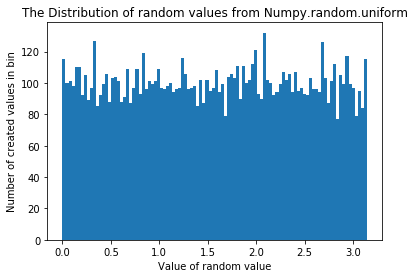
Fig 1: Uniform distribution of randomly generated numbers from numpy.random.uniform.

## Discussion

The analytical method required finding the inverse of the required distribution and putting the random number into the inverse function. This requres the function to be easily inversible, which is not always possible. 
The figures below show how 
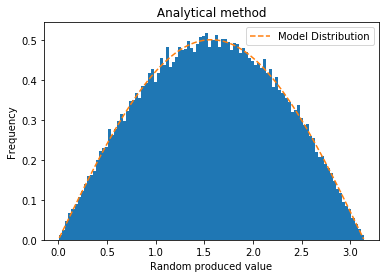
Fig 2: Sin(x) distribution created using Analytical method, with a model distribution. 
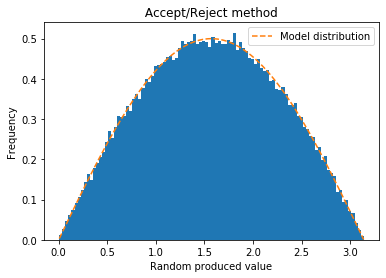
Fig 3: Sin(x) distribution created using Accept/Reject method, with a model distribution.

This method required less computational steps to preform, as for each randomly produced number we can get a number which is in the required distribution. This is in contrast to the accept/reject method, which will only accept certain random numbers that are in the range of the required distribution. This can cause the process to be more computationaly demanding then the analytical as it can create alot of wasted processes. This difference in is shown in the time to generate the plots. If we want a distribution of 100,000 then the Computing time is; $\approx 0.214 s$ (analytical), $\approx 0.9627.. s$ (Accept/reject). The fractional difference is $\approx 0.22$. So The accept reject method is $\approx$ 5x longer to compute.

Its interseting to see whether the computation time of both methods changes at the same rate for different N. This relation is shown in the function Time_distribution, which shows this trend for $ 0<n<1000$. Fig 1 shows how this distribution. 
It can be seen that the data gets scattered for larger N, this is because as the computing time increase the result is more suseptable to the flutuations in speed of the processing core.

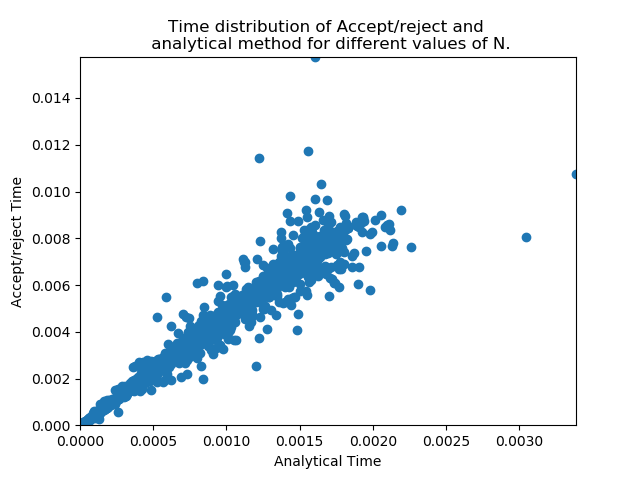 Fig 4: Distrbution of Accept/Reject and Analytical methods time to produce a distribution of random numbers for $ 0<n<1500$.

## Q2 - Simulation
A very common use of Monte Carlo is in simulating experimental data. In simulations, an entire experiment can be reproduced data point by data point, with random numbers being used to model unknowable or changing effects such as the experimental resolution or quantum variations.

In this question, we will simulate the cosmic ray experiment shown below.
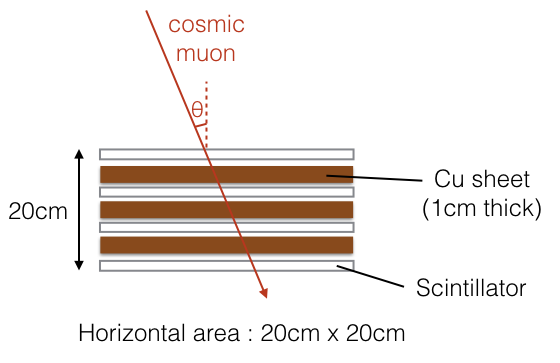
The experiment comprises 4 detection layers, each of which will produce a signal when a particle traverses the detector, separated by three sheets of copper, which will stop a fraction of muons, allowing a measurement of the muon lifetime to be made.

You can assume the detector has the following parameters :
* the efficiency of each of the 4 layers to detect a muon or electron is, from top to bottom : 55%, 60%, 85%, 50%.
* the probability of a cosmic ray muon to stop in 1cm of copper is $5\times10^{-3}$.
* electrons are emitted isotropically during decay of a stopped muon.
* decay electrons have energy 50 MeV and maximum path length of 1.8cm in copper.

In order to model the initial distribution of cosmic rays, we can assume the anuglar distribution is proportional to ${\rm cos}^2(\theta)$, for zenith angle $\theta$.  The overall normaliation can be taken from the intensity of _vertical_ muons to be 70 $m^{-2}s^{-1}sr^{-1}$. (See PDG review of cosmic rays : http://pdg.lbl.gov/2019/reviews/rpp2019-rev-cosmic-rays.pdf)


### 2a)
Using the model above, write code to simulate each muon that passes nearby the experiment. You will need to generate random numbers with appropriate distributions for the starting point and direction of each muon, and propagate each muon to the detector. You should generate further random numbers to model the stopping and decay process; ie. whether a muon stops in a given layer, and the direction of the decaying electron.

(Note that for the electron decay, you should generate points that are uniformly distributed on the unit sphere - simply generating two angles between 0 and $2\pi$ will _not_ give the correct distribution!)

You should discuss the design of your code in the text cell below.

In [11]:
import numpy as np
import matplotlib.pylab as plt
from mpl_toolkits.mplot3d import Axes3D


class Detector:
    
    """ This constructor allows the inital muon to be used in the fucntions """
    
    def __init__(self,Muon):
        self.muon = Muon
    
    """ This function moves on to the different layers """
    
    def propergation(self):
        layer1 = self.scintillator(0.55,1,self.muon)
        layer_c1 = self.copper(layer1,1)
        if layer_c1 == 'yes':
            return layer_c1
        else:
            layer2 = self.scintillator(0.6,2,layer_c1[1])
            layer_c2 = self.copper(layer2,2)
            if layer_c2 == 'yes':
                return layer_c1
            else:
                layer3 = self.scintillator(0.85,3,layer_c2[1])
                layer_c3 = self.copper(layer3,3)
                if layer_c3 == 'yes':
                    return layer_c1
                else:
                    return self.scintillator(0.5,4,layer_c3[1])
    
    """ This funciton simulates the effect of the scintillator """
    
    def scintillator(self,prob,n,Muon):
        dz = -4.25
        muon = self.coords(Muon,dz)[0]
        check = [muon['xcord'],muon['xcord'],muon['xcord']]
        che = self.check(check)
        muon['Bounds ?'] = che
        stri = 'layer '+str(n)
        muon[stri] = 'nope'
        if che == 'Out_of_bounds':
            return muon
        
        detected = self.layer_detect(prob)
        if detected == 'detect':
            muon[stri] = 'yes'
            return muon
        else:
            return muon
    
    """ This funciton simulates the effect of the copper layer """
    
    def copper(self,Muon,l):
        dz = -1
        muon = self.coords(Muon,dz)[0]
        check_2 = [muon['xcord'],muon['ycord'],muon['zcord']]
        che_2  = self.check(check_2)
        muon['Bounds ?'] = che_2
        if che_2 == 'Out_of_bounds':
            return 'no',muon
        
        che_stop = self.prob_Muon_stop(0.005,self.dis_thr_materi(check_2[0],check_2[1],check_2[2]))
        muon['Decay ?'] = che_stop
        if che_stop == 'decayed':
            elec = self.elec_dis(muon)
            elec['copper layer'] = l
            zpos = elec['zcord']
            if np.pi/2 <= elec['theta'] <= np.pi*3/2:
                Rz = np.array([20,14.75,9.5,4.25])
                dz = zpos - Rz
                #print(dz)
                return 'yes', self.copper_val(dz,elec)
            else:
                Rz = np.array([15.75,10.5,5.25,0])
                dz = Rz - zpos
                return 'yes', self.copper_val(dz,elec)
        else:
            return 'none', muon
    
    """ This funciton determines if a layer will detect the decayed Muon """
    
    def copper_val(self,dz,elec):
        iprobs = np.array([0.55,0.6,0.85,0.5])
        for i in range(0,3):
            f = dz.all()
            if 0 <= f <= 1.8:
                coords,dx,dy,dz = self.coords(elec,f)
                ch = [coords['xcord'],coords['ycord'],coords['zcord']]
                check_pos = self.check(ch)
                elec['Bounds ?'] = check_pos
                if check_pos == 'Out_of_bounds':
                    elec['Electron_detected'] = 'no_detect'
                    return elec
    
                pathlength = self.dis_thr_materi(dx,dy,dz)
                if -1.8 <= pathlength <= 1.8:
                    pro = self.layer_detect(iprobs[i])
                    elec['Electron_detected'] = pro
                    return elec
                
                else:
                    elec['Electron_detected'] = 'no_detect'
                    return elec
                                        
            else:
                elec['Electron_detected'] = 'no_detect'
                return elec
                    
    """ This function will output if a layer detected given a certain probabilty """
    
    def layer_detect(self,prob):
        x = np.random.uniform(0,1)
        if x <= prob:
            return 'detect'
        else:
            return 'no_detect'
    
    """ This function calculates the cartetian coordinates given the 2 angles and the distance wanting to be moved through """
    
    def coords(self,muon,dz):
        theta = muon['theta']
        phi = muon['phi']
        dy = np.tan(theta)*(dz*np.sin(phi))
        dx = np.tan(theta)*(dz*np.cos(phi))
        muon['xcord'] = muon['xcord'] + dx
        muon['ycord'] = muon['ycord'] + dy
        muon['zcord'] = muon['zcord'] + dz
        return muon,dx,dy,dz
    
    """ This function calculates the distance moved by the muon of over a step """
     
    def dis_thr_materi(self,dx,dy,dz):
        pathlen = np.sqrt(dx**2+dy**2+dz**2)
        return pathlen
    
    """ This function calculates the probalility of a muon stopping """
    
    def prob_Muon_stop(self,prob,pathlen):
        x = np.random.uniform(0,1)
        if x <= prob*pathlen:
            return 'decayed'
        else:
            return 'no_decay'
    
    """ This funciton checks that the particle is in the bounds of the detector. """
    
    def check(self,x):
        p = 0
        for i in range(0,len(x)):
            check = x[i]
            if 0 <= check <= 20:
                p = p + 1
        if p == len(x):
            return 'In_detector'
        else:
            return 'Out_of_bounds'
    
    """ This function creates the isotropic distribution of electrons from the stopped muon """
        
    def elec_dis(self,inital):
        r = 0.01
        theta = np.random.normal(0,2*np.pi)
        phi = np.random.normal(0,2*np.pi)
        dx = r*np.cos(theta)*np.sin(phi)
        dy = r*np.sin(theta)*np.sin(phi)
        dz = r*np.cos(phi)
        x,y,z = inital['xcord'],inital['ycord'],inital['zcord']
        Elec = {'Particle': 'Electron',
                'theta': theta,
                'phi': phi,
                'xcord':x+dx,
                'ycord':y+dy,
                'zcord':z+dz,
                'Bounds ?': 'In_detector',}
        return Elec

""" These functions are used to generate the inital random Muon. """
    
def cos_2(x):
    return np.cos(x)**2

def s(n,f,ymax):
    xn = []
    yn = []
    while len(xn) < n:
        x = np.random.uniform(0,1)
        y = np.random.uniform(0,ymax)
        if x< f(y):
            xn.append(x)
            yn.append(y)
            
    return yn[0]

def randomvalue(mini,maxa):
    x = np.random.uniform(mini,maxa)
    return x

def initalMuon():
    xmini = ymini = 0
    xmaxa = ymaxa = 20
    
    Muon = {'Particle':'Muon',
            'theta':s(100,cos_2,np.pi/2),
            'phi': randomvalue(0,2*np.pi),
            'xcord':randomvalue(xmini,xmaxa),
            'ycord':randomvalue(ymini,ymaxa),
            'zcord':20}
    return Muon
                       
        
      

### Flow diagram of the Detector program.
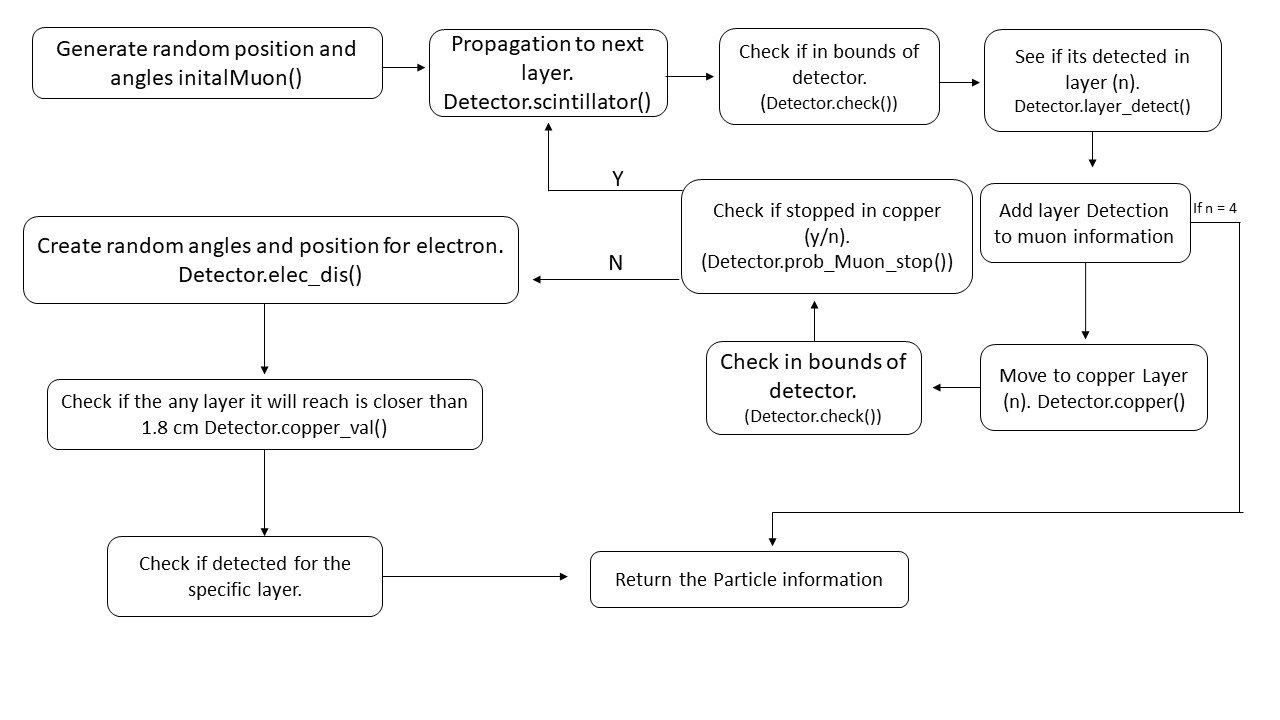
I decided the best way to tackle this problem was to generate a muon and then put this through a simulation of the detector (Detector class). I used a dictionary to house the information of the muon, its poistion angles and things like if it had decayed or if it had been detected. I decided to use a class object to house all nesessary functions for the simulation. The Class contains many functions that do many different things (The way these used each other is shown in the flow diagram of this class above). These smaller functions can then be individually tested to ensure that the porcess is working correctly, and given expected results.

I generated the inital random values using np.random. Theta required the use of an accept/reject method to create the $cos^{2}(\theta)$ distribution in range $0 - \frac{\pi}{2}$, this was because there is not a simple analytical inverse of the function $\int_{0}^{x_{rand}}cos^{2}(\theta) d\theta$. Phi was generated using a uniform distribution, so every angle is equally likely. The inital x and y position was also form a uniform distribution in range 0-20. Within the Detector object each layer as a variation of the scintilator or copper layer depening on the specific requirements e.g. probablity of being detected. 





This program takes a Intial muon input, and will give the output of the muon after propegating through the detector. This will include what layers it was detected in and whether it went out of the boundaries of the detector, also whether the muon was stopped in the copper and decayed into a electron. 

The random electron position is based on a sphere of r = 0.01, where a 2 random angles will be produced and it will then be placed on this sphere. The code then will concider incident angles that are between $ \frac{\pi}{2} < \theta < \frac{3\pi}{2} $
as moving up the detector so dz will be positive while the other angles will move down the detector. The probablity of the cloeset detector along its path will be used to see if its detected, if its pathlength is less that 1.8cm.

The propergation of the particle was done by the function coords, where it calcultated the new x,y and values for a change in z while taking into account the 2 inital angles this required using equations that converted polar $\theta$ and $\phi$ into cartesian x,y. These equation used are shown below:

$$dx = dz\tan(\theta)\sin(\phi),    
dy = dz \tan(\theta)\cos(\phi)$$,
These equations where derived from the diagram below.
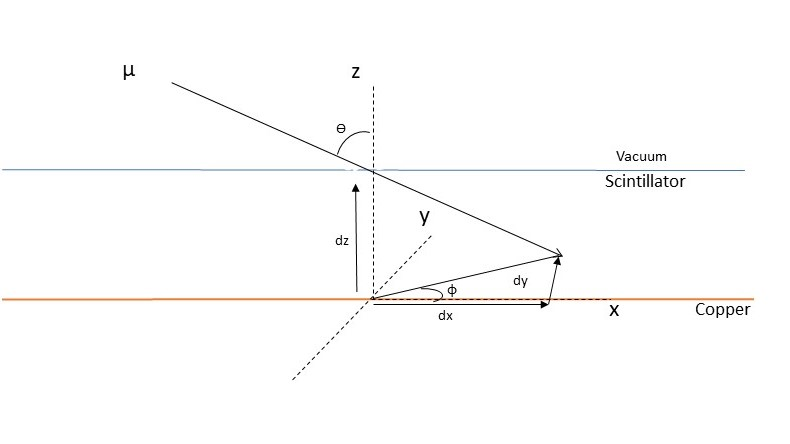

### 2b)
In the next cell you should validate your code.  The aim is to test separate parts of the code individually, to ensure the expected distributions or behaviour are produced in each case.

In [82]:
""" Test Functions """      

def Angle_tests():
    print("-- RUNNING PROGRAM: Angle_tests --")
    theta = []
    n = 0
    while n <= 10000:
        n = n + 1
        thet = s(100,cos_2,np.pi/2) #recalls the funciton we are testing
        theta.append(thet)
        
    fig, ax = plt.subplots()
    n, bins, patches = ax.hist(theta, 100, density = 1)
    y = 1.25*np.cos(bins)**2        # Model distribution with an approximate normalisation constant.
    ax.plot(bins,y,'--',label='cos**2(theta) Model Distribution')
    ax.set_title('Distribution of incident angle theta.')
    ax.set_xlabel('Theta (*)')
    ax.set_ylabel('frequency')
    plt.legend()
    plt.show()
    
def pro_test():
    print('-- RUNNING PROGRAM: pro_test --')
    muon = initalMuon()
    print('Initial Muon Position and incination :\n',muon)
    dz = np.linspace(0,-20,100)
    Muon = Detector(muon).coords(muon,dz)[0]  # Calls the coord function from Detector that we are testing
    xn,yn,zn = np.array([Muon['xcord'],Muon['ycord'],Muon['zcord']])
    fig = plt.figure()
    ax = fig.add_subplot(111,projection='3d')
    ax.scatter(xn,yn,zn,label='Muon Path')
    ax.set_xlim(0,20)
    ax.set_ylim(0,20)
    ax.set_zlim(0,20)
    ax.set_xlabel('X (cm)')
    ax.set_ylabel('Y (cm)')
    ax.set_zlabel('Z (cm)')
    

def test_singlemuon():
    print("-- RUNNING PROGRAM: test_singlemuon --")
    Muon = initalMuon()
    p = Detector(Muon).propergation()  # Calls the propergatin function from Detector that we are testing.
    print(p)                           # if the value is incorrectly Out_of_bounds then the function will return False  
    if p['Bounds ?'] == 'In_detector':
        if 0<= p['xcord']<=20:
            if 0 <= p['ycord'] <= 20:
                if 0 <= p['zcord'] <= 20:
                    return print('True')
        else:
            return print('False')
    if p['Bounds ?'] == 'Out_of_bounds':
        if 0<= p['xcord']<= 20:
            if 0<= p['ycord']<= 20:
                if 0<= p['zcord']<= 20:
                    print('False')
        else:
            return print('True')


def elec_dis_test(N,elevation,rotation):
    X = []
    Y = []
    Z = []
    for i in range(0,N):
        intial = {'xcord':0,'ycord':0,'zcord':0}
        elec = Detector(intial).elec_dis(intial)  # Calls the electron distribution function from Detection 
        x,y,z = elec['xcord'],elec['ycord'],elec['zcord']
        X.append(x)
        Y.append(y)
        Z.append(z)
    fig = plt.figure()
    ax = fig.add_subplot(111,projection='3d')
    ax.scatter(X,Y,Z)
    ax.set_title('Distribution of isotropic electron Distribution.')
    ax.set_xlabel('X (cm)')
    ax.set_ylabel('Y (cm)')
    ax.set_zlabel('Z (cm)')
    ax.set_xlim(-0.01,0.01)
    ax.set_ylim(-0.01,0.01)
    ax.set_zlim(-0.01,0.01)
    ax.view_init(elevation,rotation)  # Allows for the changing of angles to view the 3d image.
    plt.show() 


#elec_dis_test(1000,30,30) # note that you can see this from different angles.
#test_singlemuon()
#pro_test()
#Angle_tests()

## Code discussion

The test function,pro_test() ,above shows the path moved by a single moun through the detector. This shows that the muon is being propergated through the detector properly as it would otherwise not be a straight line and not in the range of the detector.

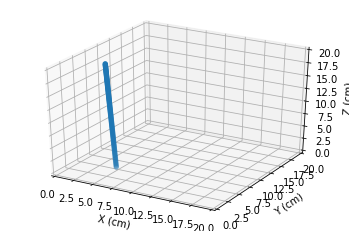
FIG 5: The path of a Muon through the detector.

The angle_tests() function shows the distribtution of Theta that was created from the accept/reject method and the model distribution shows that it is correct.

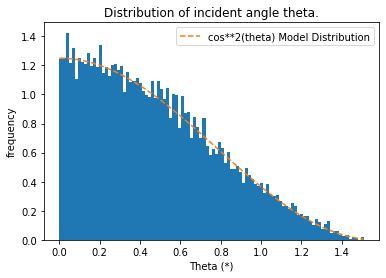
FIG 6: The distribution of $\theta$ angles that is proportional to $cos^{2}(\theta)$, with the a model distribution. 

The function Tests_singleMuon() allows us to see the data of a single muon at a time. Here we can look at the different quatities and see if the data is consistent. It also explicity will say if the program correctly determined if the particle was still within the detector volume. The data from a Particle will look like the following:


{'Particle': 'Muon', 'theta': 0.39796423736593106, 'phi': 2.300404331673894, 'xcord': 12.362067240829077, 'ycord': 9.140048710576954, 'zcord': 0.0, 'Bounds ?': 'In_detector', 'layer 1': 'yes', 'Decay ?': 'no_decay', 'layer 2': 'yes', 'layer 3': 'yes', 'layer 4': 'nope'}


elec_dis_test(N,elevation,rotation) tests that the electron is emitted isotropically, if it is then the points on a unit circle will be randomly distributed with no structure. This is what is seen when runing this program. 

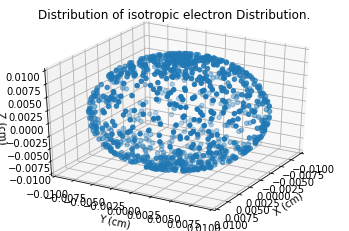
FIG 7: The map of emitted electrons with a n isotropic distribution.

### 2c)
Now, use your simulation to estimate :
* The total rate of muons that pass through the detector.
* The fraction of those muons which are registered in 1, 2, 3 or 4 scintillator planes of the detector. 
* The fraction of those muons which decay and produce an electron that can be detected in an adjacent scintillator layer.

-- RUNNING PROGRAM: Stats_of_detector ---
Muon numbers 3285
Electron Number 715
Number that left the detector at some point : 1492
scintillator 1: 0.40725
scintillator 2: 0.389
scintillator 3: 0.49025
scintillator 4: 0.25825
copper layer 1 : 0.07975 | Number of detections : 98
copper layer 2 : 0.05825 | Number of detections : 79
copper layer 3 : 0.04075 | Number of detections : 66
Fraction of Electrons to Muons: 0.2176560121765601
Exposure time for this many Muons : 2.010405860735165 hrs


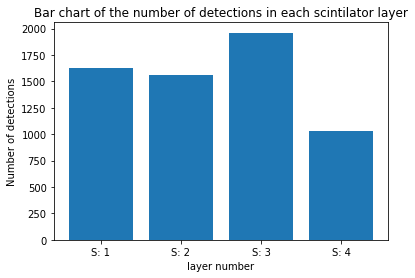

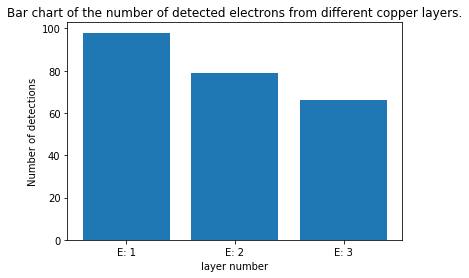

In [93]:
""" This code will create many muon dectections and keep a log of how many where detected, 
    and the fraction that is electrons """

def Stats_of_detector(G):
    print('-- RUNNING PROGRAM: Stats_of_detector ---')
    n1=n2=n3=n4= 0
    e1=e2=e3=0
    e1d = e2d = e3d = 0
    g = G
    bn = 0
    em = ee = 0
    while g > 0:      # Sums the variables that we are intersting in looking at.
        g = g-1
        muon = initalMuon()
        b = Detector(muon).propergation()  
        if b['Bounds ?'] == 'Out_of_bounds':
            bn = bn + 1
        if b['Particle'] == 'Muon':
            em = em + 1
            if b['layer 1'] == 'yes':
                n1 = n1 + 1
            if b['layer 2'] == 'yes':
                n2 = n2 + 1
            if b['layer 3'] == 'yes':
                n3 = n3 + 1
            if b['layer 4'] == 'yes':
                n4 = n4 + 1
        if b['Particle'] == 'Electron':
            ee = ee + 1
            if b['copper layer'] == 1:
                e1 = e1 + 1
                if b['Electron_detected'] == 'detect':
                    e1d = e1d + 1
            if b['copper layer'] == 2:
                e2 = e2 + 1
                if b['Electron_detected'] == 'detect':
                    e2d = e2d + 1
            if b['copper layer'] == 3:
                e3 = e3 + 1
                if b['Electron_detected'] == 'detect':
                    e3d = e3d + 1
    print('Muon numbers',em)
    print('Electron Number',ee)
    print('Number that left the detector at some point :', bn)
    print('scintillator 1:',n1/G)                    
    print('scintillator 2:',n2/G)
    print('scintillator 3:',n3/G)
    print('scintillator 4:',n4/G)
    print('copper layer 1 :',e1/G,'| Number of detections :',e1d)
    print('copper layer 2 :',e2/G,'| Number of detections :',e2d)
    print('copper layer 3 :',e3/G,'| Number of detections :',e3d)
    print('Fraction of Electrons to Muons:',ee/em)
    print('Exposure time for this many Muons :', G/(13.817*0.2*0.2*60*60),'hrs')
    
    x = [n1,n2,n3,n4]
    plt.bar(['S: 1','S: 2','S: 3','S: 4'],x)
    plt.title('Bar chart of the number of detections in each scintilator layer')
    plt.xlabel('layer number')
    plt.ylabel('Number of detections')
    plt.show()
    
    y = [e1d,e2d,e3d]
    plt.bar(['E: 1','E: 2','E: 3'],y)
    plt.title('Bar chart of the number of detected electrons from different copper layers.')
    plt.xlabel('layer number')
    plt.ylabel('Number of detections')
    plt.show()
    
Stats_of_detector(4000)

## Discussion 

The total rate of muons that will pass through the detector can be determined from the verticle intensity of muons. So the total rate of muons for the 20x20x20 detector with incoming muons with a distrbution $cos^2(\theta)$, is given by:

$$
F = \int_{0}^{A}\int_{0}^{2\pi}\int_{0}^{2\pi} 70cos^2(\theta) d\theta d\phi dA = 13.8173 s^{-1} m^{-2}$$

This means if we put N muons through the detector we can determine the exposure time ,$T$, for this number of muons.
$$ T = \frac{N}{F A}. $$
This is shown as a result from the function Stats_of_detector.

We can see from the information from the function Stats_of_detector that the number of detections by the scintillators is representative of there efficiencies of detecting a particle. Where as the number of electrons that are detected is representative of how far down the detector the copper layer is.
It can be seen that the fractions are lower that the probability of each layer, this is because Muons will leave the detector beofre they can be detected by the scintillator layer, and as you go further down the detector more muons will leave before reaching the lowest layer.


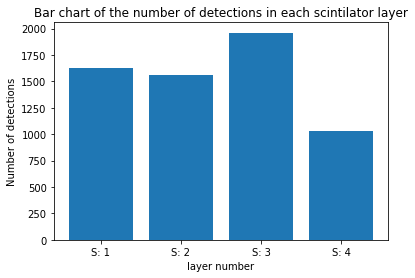
FIG 8: This figure shows the number of detections in each scintillator layer, 1 at surface and 4 at the bottom of the detector.

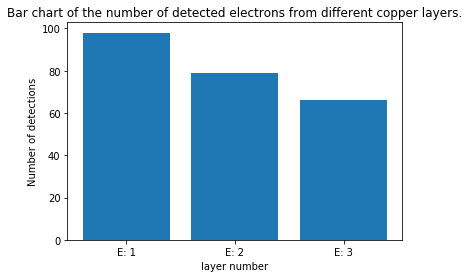 FIG 9: This figure shows the number of electrons that where detected after being stopped in there copper layer.






This question is well suited to extensions. For example, a negative muon stopping in the Copper may be "captured" by an atomic nucleus, which modifies its lifetime (to ~0.164 $\mu s$). Positive muons are not captured and hence their lifetime is unaffected. You can simulate this, to estimate the expected distribution of muon decay times.  (An even more detailed simulation could include muons that stop in scintillator...)

Feel free to discuss possible extensions with your demonstrator and/or the unit director !

## Q3 - Statistical Analysis

In this question, we will explore the use of Monte Carlo methods to understand experiment outcomes.

Standard experimental error analysis frequently uses the assumption that uncertainties are normally distributed. The interpretation of a result quoted as $\mu \pm \sigma$ is taken that the true value lies within the range [$(\mu - \sigma$),$(\mu + \sigma)$] with a certain probability (usually 68%). However, it is not hard to find cases where these assumptions break. A classic example occurs when measuring a parameter that is close to a physical boundary - the standard error treatment may result in a range of values that includes the non-physical region.

A more sophisticated approach is to treat the measurement process as an inverse problem, ie. the inference of model parameters from experimental measurements. (For example, estimation of G from observations of planetary motion). Given a model, we can use Monte Carlo techniques to generate ensembles of "pseudo-experiments", and build up distributions of experimental outcomes for a given set of model parameters. Then it is straightforward to find the range of model parameters that cover an actual experimental observation, within a specified probability.

### 3a)

A "counting experiment" is performed at a collider, to search for the existence of a hypothesised new particle.  The experiment consists of counting the number of events that meet certain criteria. Events can be produced either by the hypothetical signal process, or by known background processes. However, an individual event cannot be ascribed to be signal or background - the only measurable quantity is the _total_ number of events.

Both signal and background processes produce a number of events that is Poisson distributed. The mean number of background events has been estimated to be $4.8 \pm 0.5$.  The mean number of signal events is given by $L \sigma$, where the integrated luminosity $L=10 nb^{-1}$, and $\sigma$ is the (unknown) cross section of the signal process. The number of events observed in the counting experiment is 6.

You should write a Monte Carlo programme that will calculate the upper limit on the signal cross section that is compatible with the observation at 95% confidence level.

You will need to generate pseudo-experiments for a range of different signal cross sections. For each pseudo-experiment, generate random numbers to model the Gaussian uncertainty on the background prediction, and the Poisson variation in both the background and signal production. Ensure that the number of pseudo-experiments are sufficient to measure the experimental distribution for each cross section, and in particular the fraction of the distribution that is _greater_ than the measured value (the confidence level).

How would you incorporate additional uncertainties?  For example, if the uncertainty on the luminosity is 5%, or the efficiency to identify signal events is estimated to be $0.7 \pm 0.1$ ?

-- RUNNING PROGRAM: stats_analysis --


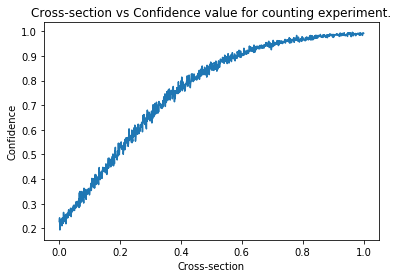

Upper limit of sigma for a confindence value of 95%:  0.6790000000000005
-- RUNNING PROGRAM: stats_analysis --


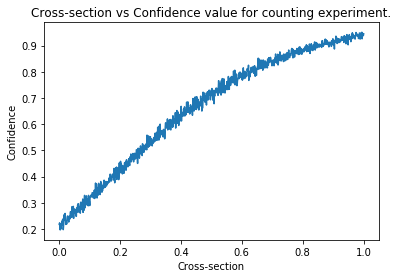

Upper limit of sigma for a confindence value of 95%:  0.9940000000000008
-- RUNNING PROGRAM: stats_analysis --


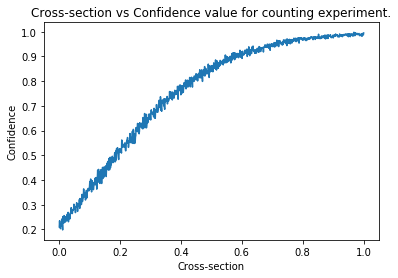

Upper limit of sigma for a confindence value of 95%:  0.6980000000000005


In [73]:
def stats_analysis(version):
    L = 10
    sigma = 0
    S = []
    Con = [] 
    lim = []
    print('-- RUNNING PROGRAM: stats_analysis --')
    while sigma < 1:
        sigma = sigma + 0.001
        S.append(sigma)
        N = 0
        N_6 = 0
        while N < 1000:
            tbg = np.random.normal(4.8,0.5) #true bg
            rbg = np.random.poisson(tbg)
            if version == '1st': #with original uncertanties
                srcmean = L*sigma
            if version == '2nd': #with additional uncertanties
                srcmean = np.random.normal(10,0.5)*np.random.normal(0.7,0.1)*sigma 
            if version =='3rd':
                srcmean = np.random.normal(10,0.5)*sigma
            src = np.random.poisson(srcmean)
            N = N + 1
            totalevts = rbg + src
            if totalevts > 6:
                N_6 = N_6 + 1
        confidence = N_6/N
        Con.append(confidence)
        if confidence > 0.95000:
            lim.append(sigma)
    
    plt.plot(S,Con)
    plt.title('Cross-section vs Confidence value for counting experiment.')
    plt.xlabel('Cross-section')
    plt.ylabel('Confidence')
    plt.show()
    print('Upper limit of sigma for a confindence value of 95%: ',lim[0],'nb')

stats_analysis('1st')
stats_analysis('2nd')
stats_analysis('3rd')

## Discussion
From the program above the upper limit on the signal cross-section, $\sigma$, with just the standard errors for a confidence value greater than 95%: $\sigma\approx 0.681 nb$. This is different to the value you get when taking into account the 5% uncertainty on the on the luminosity.Which gives $\sigma\approx 0.668 nb$, which is very similar to the value you get when not including the distribution of luminosity. When also including the efficiency to identify signal events as $0.7 \pm 0.1$ we get : $\sigma\approx 0.992 nb$. The additional uncertainites were added as factors to the source mean with normal distributions. 
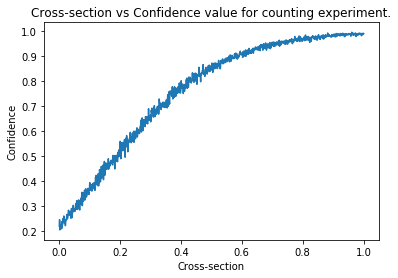
FIG 10: This graph shows the relation between confidence value and cross-section of the origianl uncertainties. With upper limit at $\sigma\approx 0.681 nb$ 
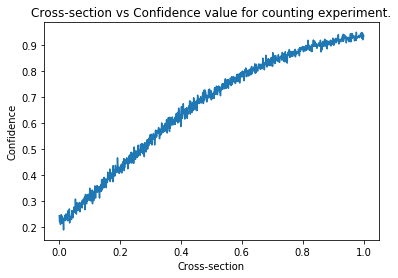
FIG 11: This graph shows the relation between confidence value and cross-section of the additional uncertainties. With upper limit at $\sigma\approx 0.992 nb$ 


# Extension: Monte Carlo Methods in Error Propergation example
## Error on Galaxy Cluster Axial symetry measurements

Using Monte carlo methods you can also approximate error porpergation. In astronomy when looking at an image that has been created from photon counts on pixels, an error due to the background count rate can be approximatly determined by calculating new points from a Poisson distribution with the mean of the original data. And then calculating the standard deviation of the many new Axial symetry values.

This was done on a program to determine the axial symetery (symetry around a central point) of a galaxy cluster image (as part of my final year project). The function below has a small cluster like image written as an array. Its not a real cluster as the file would be too big but it has the same charateristics and is sutible for demonstation purposes. Below are the images of cluster SPT-CLJ2344-4242 and the demonstation cluster. If the image is pergectly symetric around the centre the value will be 0.

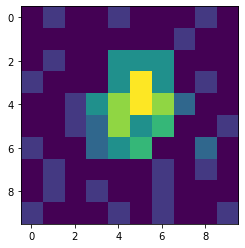
FIG 12: Image of the demonstation galaxy cluster.

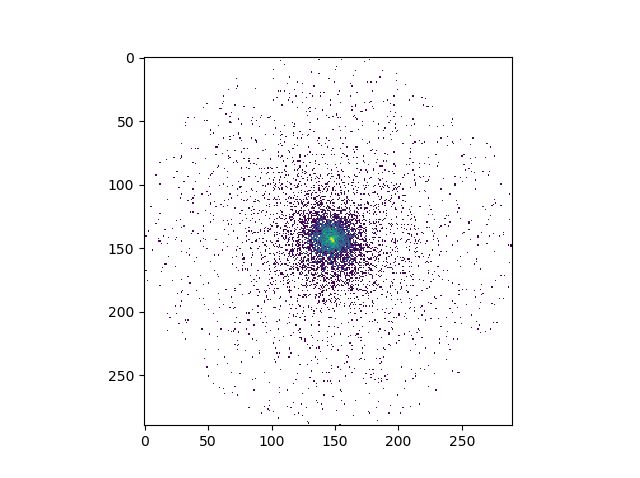
FIG 13 : Image of Galaxy Cluster SPT-CLJ2344-4242, data from the Chandra Data Archive (NASA).

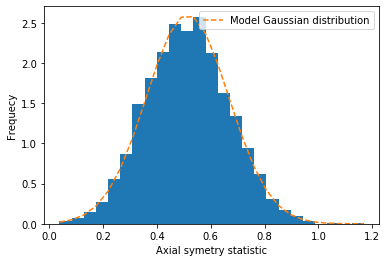
FIG 14: gaussian distribution of possible values of Axial symeytry measurements on a image of a galaxy cluster.


Cluster Axial Symetry statistic : 0.4888805678379152


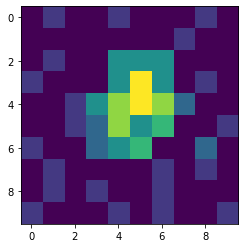

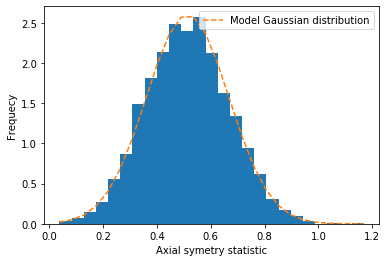

Mean : 0.5141886044927839
Standard Deviation : 0.1531506745934109


In [81]:
""" Monte Carlo methods in Galaxy cluster axial symetry measurements """

""" This fucntion calculates the symetry value """
def cluster_symetry(A,N):
    n0 = 0
    Atot = 0
    for i in range(0,len(A)-1):
        for j in range(0,len(A)-1):
            if A[i,j] != 0:
                n0 = 1 + n0 
                Atot =Atot + A[i,j]
    
    cpx = cpy = N/2
    cp = np.array([[cpx],[cpy]])
    res = 0
    for i in range(0,N-1):
        for j in range(0,N-1):
            if i == cpx:
                if j ==cpy:
                    res = res + 0
            else:
                point = np.array([[i],[j]])
                x = np.subtract(point,cp)
                y = A[i,j]
                res = np.add(res,x*y)  
    
    meanA = Atot/n0
    vec = res/(meanA*n0)   
    c = np.linalg.norm(res)
    sym = c/(meanA*n0)
    
    return sym, c, vec

""" This fucntion calculates the error of the symetry value using Monte Carlo Methods. """
def sym_error(A,N,Ni):
        
    disym = []
    for n in range(0,Ni):
        
        An = np.zeros((len(A),len(A)))
        for i in range(0,len(A)-1):                 #
            for j in range(0,len(A)-1):             # This replaces every point on the image with a random number form a poisson 
                if A[i,j] != 0:                     # distribution with the mean of the point on the original image. 
                    An[i,j] = np.random.poisson(A[i,j])
        syme = cluster_symetry(An,N)[0]
        disym.append(syme)
        #return di
        
    Mean = np.mean(disym)
    sd = np.std(disym)
    fig, ax = plt.subplots()
    n, bins, patches = ax.hist(disym, 25, density=1)
    y = 2.6*np.exp(-1/2 * ((bins-Mean)/sd)**2) # with approximate normalisation. 
    ax.plot(bins,y,'--',label = 'Model Gaussian distribution')
    ax.set_xlabel('Axial symetry statistic')
    ax.set_ylabel('Frequecy')
    plt.legend()
    plt.show()
    print('Mean :',Mean)
    print('Standard Deviation :',sd)
       
A = np.array([[0,1,0,0,1,0,0,0,1,0],
              [0,0,0,0,0,0,0,1,0,0],
              [0,1,0,0,3,3,3,0,0,0],
              [1,0,0,0,3,6,3,0,1,0],
              [0,0,1,3,5,6,5,2,0,0],
              [0,0,1,2,5,3,4,0,0,1],
              [1,0,0,2,3,4,0,0,2,0],
              [0,1,0,0,0,0,1,0,1,0],
              [0,1,0,1,0,0,1,0,0,0],
              [1,0,0,0,1,0,1,0,0,1]]) 
plt.imshow(A)
print('Cluster Axial Symetry statistic :',cluster_symetry(A,9)[0])
sym_error(A,9,5000)
